In [ ]:

!pip install gym
!pip install torch


1.Write a python program using Neural Networks for demonstrating Reinforcement Agent, Environment and Reward


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import gym
import numpy as np
from tqdm import tqdm

# Define the PolicyNetwork class
class PolicyNetwork(nn.Module):
    def __init__(self, input_size, output_size):  # Fix the typo here
        super(PolicyNetwork, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(input_size, 128),
            nn.ReLU(),
            nn.Linear(128, output_size),
            nn.Softmax(dim=-1)
        )

    def forward(self, x):
        return self.fc(x)

# Define the Agent class
class Agent(nn.Module):
    def __init__(self, input_size, output_size, learning_rate=0.01, gamma=0.99):  # Fix the typo here
        super(Agent, self).__init__()
        self.policy_network = PolicyNetwork(input_size, output_size)
        self.optimizer = optim.Adam(self.policy_network.parameters(), lr=learning_rate)
        self.gamma = gamma

    def select_action(self, state):
        state = torch.tensor(state, dtype=torch.float32)
        action_probabilities = self.policy_network(state)
        action_distribution = torch.distributions.Categorical(action_probabilities)
        action = action_distribution.sample()
        return action.item()

# Create the environment
env = gym.make('CartPole-v1')

# Create the agent
agent = Agent(input_size=env.observation_space.shape[0], output_size=env.action_space.n)
for episode in range(num_episodes):
 state = env.reset()
 episode_reward = 0
 while True:
  action = agent.select_action(state)
  next_state, reward, done, _ = env.step(action)
  agent.optimizer.zero_grad()
  state = torch.from_numpy(state).float()
  action = torch.tensor(action)
  reward = torch.tensor(reward)
  log_prob = torch.log(agent.policy_network(state)[action])
  loss = -log_prob * reward
  loss.backward()
  agent.optimizer.step()
  episode_reward += reward
  state = next_state
  if done:
   break
  if episode % 10 == 0:
    print(f"Episode {episode}, Total Reward: {episode_reward}")
env.close()

/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:241: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


Episode 0, Total Reward: 1.0
Episode 0, Total Reward: 2.0
Episode 0, Total Reward: 3.0
Episode 0, Total Reward: 4.0
Episode 0, Total Reward: 5.0
Episode 0, Total Reward: 6.0
Episode 0, Total Reward: 7.0
Episode 0, Total Reward: 8.0
Episode 0, Total Reward: 9.0
Episode 0, Total Reward: 10.0
Episode 0, Total Reward: 11.0
Episode 0, Total Reward: 12.0
Episode 0, Total Reward: 13.0
Episode 0, Total Reward: 14.0
Episode 0, Total Reward: 15.0
Episode 0, Total Reward: 16.0
Episode 0, Total Reward: 17.0
Episode 0, Total Reward: 18.0
Episode 0, Total Reward: 19.0
Episode 0, Total Reward: 20.0
Episode 0, Total Reward: 21.0
Episode 0, Total Reward: 22.0
Episode 0, Total Reward: 23.0
Episode 0, Total Reward: 24.0
Episode 0, Total Reward: 25.0
Episode 0, Total Reward: 26.0
Episode 0, Total Reward: 27.0
Episode 0, Total Reward: 28.0
Episode 0, Total Reward: 29.0
Episode 0, Total Reward: 30.0
Episode 0, Total Reward: 31.0
Episode 0, Total Reward: 32.0
Episode 0, Total Reward: 33.0
Episode 0, Total Re

2.Write a python program to demonstrate Markov Decision Process in Reinforcement Learning Environment

In [ ]:
import numpy as np

# Define the grid world (states)
states = [(0, 0), (0, 1), (0, 2),
          (1, 0), (1, 1), (1, 2),
          (2, 0), (2, 1), (2, 2)]

# Define possible actions (up, down, left, right)
actions = {'U': (-1, 0), 'D': (1, 0), 'L': (0, -1), 'R': (0, 1)}

# Define the state transition function
def transition(state, action):
    new_state = (state[0] + action[0], state[1] + action[1])
    if new_state in states:
        return new_state
    return state  # Stay in the same state if the action leads to an invalid state

# Define the rewards for each state
rewards = {
    (0, 0): -1,
    (0, 1): -1,
    (0, 2): -1,
    (1, 0): -1,
    (1, 2): -1,
    (2, 0): -1,
    (2, 1): -1,
    (2, 2): 1,  # The goal state with a reward of 1
}

# Define the discount factor
gamma = 0.9

# Define a policy (agent's strategy) - deterministic for simplicity
policy = {
    (0, 0): 'R',  # Move right when in (0, 0)
    (0, 1): 'R',
    (0, 2): 'U',
    (1, 0): 'R',
    (1, 2): 'U',
    (2, 0): 'R',
    (2, 1): 'R',
    (2, 2): 'U',  # Move up when in (2, 2)
}

# Perform value iteration to find the optimal values of each state
V = {state: 0 for state in states}
while True:
    delta = 0
    for state in states:
        if state not in policy:
            continue
        v = V[state]
        action = policy[state]
        next_state = transition(state, actions[action])

        # Check if the next_state is a valid state
        if next_state in rewards:
            reward = rewards[next_state]
            V[state] = reward + gamma * V[next_state]
            delta = max(delta, abs(v - V[state]))

    if delta < 1e-6:
        break

# Print the values of each state
for i in range(3):
    for j in range(3):
        state = (i, j)
        print(f"State {state}: Value = {V[state]:.2f}")


State (0, 0): Value = -10.00
State (0, 1): Value = -10.00
State (0, 2): Value = -10.00
State (1, 0): Value = 0.00
State (1, 1): Value = 0.00
State (1, 2): Value = -10.00
State (2, 0): Value = -8.20
State (2, 1): Value = -8.00
State (2, 2): Value = -10.00


3.Demonstrate the functions behind state and policies in Reinforcement Learning using Python Program through a 2 X 2 grid.

In [ ]:
# Define states and actions
states = [(0, 0), (0, 1), (1, 0), (1, 1)]
actions = {'Up': (-1, 0), 'Down': (1, 0), 'Left': (0, -1), 'Right': (0, 1)}


policy = {
 (0, 0): 'Right',
 (0, 1): 'Down',
 (1, 0): 'Right',
 (1, 1): 'Up'
}
# Function to get the next state based on the current state and action
def get_next_state(state, action):
  next_state = (state[0] + actions[action][0], state[1] + actions[action][1])
  if next_state in states:
    return next_state
  return state
# Function to determine the action the agent takes in a given state
def get_action(state):
  return policy[state]
# Demonstrate how the functions work
current_state = (0, 0)
for _ in range(3):
 action = get_action(current_state)
 next_state = get_next_state(current_state, action)
 print(f"Current State: {current_state}, Action: {action}, Next State: {next_state}")
 current_state = next_state

Current State: (0, 0), Action: Right, Next State: (0, 1)
Current State: (0, 1), Action: Down, Next State: (1, 1)
Current State: (1, 1), Action: Up, Next State: (0, 1)


4.Demonstrate Bell-man equation functionality in Reinforcement Learning using Python Programming through 3 X 3 grid

In [ ]:
import numpy as np
# Define the grid world
grid_world = np.zeros((3, 3))
# Define the state transition function (up, down, left, right)
actions = [(0, -1), (0, 1), (-1, 0), (1, 0)]
# Define the reward for each state
rewards = {
 (0, 2): 10, # Goal state
 (1, 2): -10, # Penalty state
}
# Define the discount factor
gamma = 0.9
# Perform the Bellman update for state values
num_iterations = 100
for _ in range(num_iterations):
  new_grid_world = np.copy(grid_world)
  for i in range(3):
    for j in range(3):
      if (i, j) not in rewards:
        new_values = []
        for action in actions:
          next_i, next_j = i + action[0], j + action[1]
          if 0 <= next_i < 3 and 0 <= next_j < 3:
            new_values.append(grid_world[next_i, next_j])
        if new_values:
          new_grid_world[i, j] = max(new_values) * gamma
grid_world = new_grid_world
# Print the final state values
print("State Values:")
print(grid_world)


State Values:
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


5.Induce a Mouse-pile of cheese strategy to get maximum rewards for the mouse in 3 X 4 grid using Bellman Equation using python programming in a reinforcement Learning environment

In [ ]:
import numpy as np
# Define the grid world
n_rows, n_cols = 3, 4
grid_world = np.zeros((n_rows, n_cols))
# Define rewards
rewards = {
 (0, 3): 10, # Cheese state
 (1, 3): -10, # Penalty state
}
# Define discount factor
gamma = 0.9
# Define actions
actions = [(0, 1), (0, -1), (1, 0), (-1, 0)]
action_names = ['Right', 'Left', 'Down', 'Up']
# Function to calculate the Bellman update for a state
def bellman_update(i, j, action):
  if (i, j) in rewards:
    return rewards[(i, j)]
  total_reward = 0
  for a, (di, dj) in enumerate(actions):
    next_i, next_j = i + di, j + dj
    if 0 <= next_i < n_rows and 0 <= next_j < n_cols:
      total_reward += 0.25 * (grid_world[next_i, next_j] * gamma)

  return total_reward
# Perform the Bellman update for state values
num_iterations = 100
for _ in range(num_iterations):
  new_grid_world = np.zeros((n_rows, n_cols))
  for i in range(n_rows):
    for j in range(n_cols):
      new_grid_world[i, j] = max([bellman_update(i, j, a) for a in actions])
grid_world = new_grid_world
# Calculate the optimal policy
optimal_policy = np.empty((n_rows, n_cols), dtype=object)
for i in range(n_rows):
  for j in range(n_cols):
    if (i, j) not in rewards:
      optimal_policy[i, j] = action_names[np.argmax([bellman_update(i, j, a) for a in
actions])]
# Print the optimal policy
print("Optimal Policy:")
for row in optimal_policy:
 print(" | ".join([action if action is not None else '-' for action in row]))

Optimal Policy:
Right | Right | Right | -
Right | Right | Right | -
Right | Right | Right | Right


6.A Fire of value -1 and Maximum Reward of Value 1 placed on the (1,4) and (2,4) place of matrix and you are placed on the initial block of (1,1) on the matrix, through Reinforcement learning Strategy how will obtain the maximum reward using python programming.

In [ ]:
import numpy as np

# Define the grid world
n_rows, n_cols = 2, 5
grid_world = np.zeros((n_rows, n_cols))

# Define rewards
rewards = {
    (1, 4): 1,  # Maximum Reward
    (2, 4): 1,  # Maximum Reward
    (1, 3): -1,  # Fire state
    (2, 3): -1,  # Fire state
}

# Define discount factor
gamma = 0.9

# Define actions (up, down, left, right)
actions = [(0, 1), (0, -1), (1, 0), (-1, 0)]
action_names = ['Right', 'Left', 'Down', 'Up']

# Function to calculate the Bellman update for a state
def bellman_update(i, j, action):
    if (i, j) in rewards:
        return rewards[(i, j)]

    total_reward = 0
    for a, (di, dj) in enumerate(actions):
        next_i, next_j = i + di, j + dj
        if 0 <= next_i < n_rows and 0 <= next_j < n_cols:
            total_reward += 0.25 * (grid_world[next_i, next_j] * gamma)

    return total_reward

# Perform the Bellman update for state values
num_iterations = 100
for _ in range(num_iterations):
    new_grid_world = np.zeros((n_rows, n_cols))
    for i in range(n_rows):
        for j in range(n_cols):
            new_grid_world[i, j] = max([bellman_update(i, j, a) for a in actions])
    grid_world = new_grid_world

# Calculate the optimal policy
optimal_policy = np.empty((n_rows, n_cols), dtype=object)
for i in range(n_rows):
    for j in range(n_cols):
        if (i, j) not in rewards:
            optimal_policy[i, j] = action_names[np.argmax([bellman_update(i, j, a) for a in actions])]

# Print the optimal policy
print("Optimal Policy:")
for row in optimal_policy:
    print(" | ".join([action if action is not None else '-' for action in row]))


Optimal Policy:
Right | Right | Right | Right | Right
Right | Right | Right | - | -


7.Display and visualize the difference in Learning of Exploitation and Expectation mechanisms by an agent in a Reinforcement Learning Environment using Python Programming

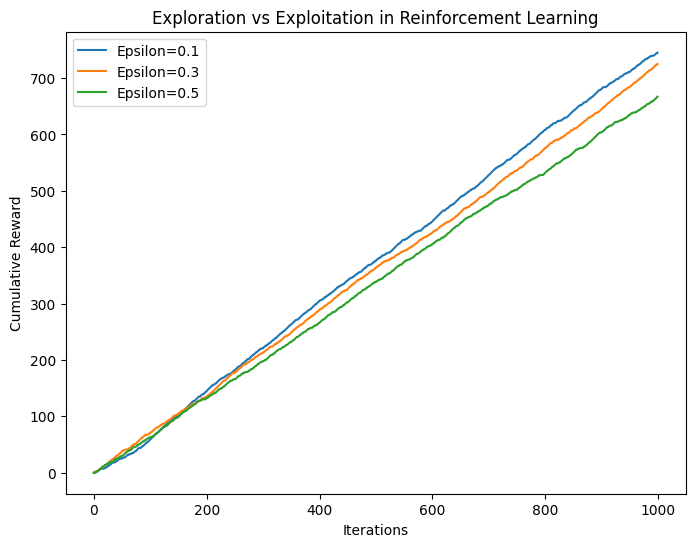

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Function to simulate the bandit problem with different arms having different reward probabilities
class Bandit:
    def __init__(self, arms):
        self.arms = arms

    def pull_arm(self, arm):
        return np.random.rand() < self.arms[arm]

# Epsilon-greedy algorithm for exploration and exploitation
def epsilon_greedy(epsilon, num_iterations, bandit):
    num_actions = len(bandit.arms)
    action_values = np.zeros(num_actions)
    action_attempts = np.zeros(num_actions)
    rewards = []

    for _ in range(num_iterations):
        if np.random.rand() < epsilon:
            # Exploration: Choose a random action
            action = np.random.randint(num_actions)
        else:
            # Exploitation: Choose the action with the highest estimated value
            action = np.argmax(action_values)

        reward = bandit.pull_arm(action)
        rewards.append(reward)

        # Update action attempts and estimated action values
        action_attempts[action] += 1
        action_values[action] += (reward - action_values[action]) / action_attempts[action]

    return rewards

# Define the bandit arms (reward probabilities)
arms = [0.3, 0.5, 0.8]  # Example probabilities

# Create a bandit environment
bandit = Bandit(arms)

# Run epsilon-greedy algorithm with different values of epsilon
epsilon_values = [0.1, 0.3, 0.5]
num_iterations = 1000

plt.figure(figsize=(8, 6))

for epsilon in epsilon_values:
    rewards = epsilon_greedy(epsilon, num_iterations, bandit)
    plt.plot(np.cumsum(rewards), label=f'Epsilon={epsilon}')

plt.xlabel('Iterations')
plt.ylabel('Cumulative Reward')
plt.legend()
plt.title('Exploration vs Exploitation in Reinforcement Learning')
plt.show()


8.Demonstrate the value when exploration mechanism is implemented into the input matrix of 6X4

In [ ]:
import numpy as np
import random

# Define the grid world
n_rows, n_cols = 6, 4

# Define actions (up, down, left, right)
actions = [(0, 1), (0, -1), (1, 0), (-1, 0)]

# Define exploration probability (ε)
epsilon = 0.2

# Initialize the state values
state_values = np.zeros((n_rows, n_cols))

# Function to check if a state is within the grid boundaries
def within_bounds(state):
    row, col = state
    return 0 <= row < n_rows and 0 <= col < n_cols

# Function to choose an action using ε-greedy strategy
def choose_action(state):
    if random.uniform(0, 1) < epsilon:
        # Exploration: Choose a random action
        return random.choice(range(len(actions)))
    else:
        valid_actions = []
        for a in actions:
            next_state = (state[0] + a[0], state[1] + a[1])
            if within_bounds(next_state):
                valid_actions.append(state_values[next_state])
            else:
                valid_actions.append(float('-inf'))  # Assign negative infinity to invalid actions
        return np.argmax(valid_actions)

# Learning loop (Q-learning with temporal difference)
num_episodes = 1000

for _ in range(num_episodes):
    current_state = (0, 0)

    while True:
        action = choose_action(current_state)
        move = actions[action]
        next_state = (current_state[0] + move[0], current_state[1] + move[1])

        # Simulated reward function (example)
        if next_state == (5, 3):
            reward = 1
        else:
            reward = 0

        if within_bounds(next_state):
            # Update the state value using Q-learning (temporal difference)
            state_values[current_state] += 0.1 * (
                reward + 0.9 * state_values[next_state] - state_values[current_state]
            )

            current_state = next_state
        else:
            break  # Break the loop if the next state is out of bounds

# Display the state values with exploration
print("State Values with Exploration:")
print(state_values)



State Values with Exploration:
[[1.96566305 2.20571471 2.46855732 2.83488519]
 [1.74706827 2.14917878 2.59995776 3.21425464]
 [0.1728998  0.81686581 2.9362531  3.53680281]
 [0.         1.06994227 3.35732575 3.81088776]
 [0.10795258 2.17089918 3.90077905 4.63408239]
 [0.53918546 3.59267312 4.45793472 4.11705067]]


9.Demonstrate the value when exploitation mechanism is implemented into the input matrix of 6X4

In [ ]:
import numpy as np

# Define the grid world
n_rows, n_cols = 6, 4

# Define actions (up, down, left, right)
actions = [(0, 1), (0, -1), (1, 0), (-1, 0)]

# Initialize the state values
state_values = np.zeros((n_rows, n_cols))

# Simulated reward function (example)
rewards = np.zeros((n_rows, n_cols))
rewards[5, 3] = 1  # Maximum Reward

# Discount factor
gamma = 0.9

# Q-Learning: Update state values using exploitation
num_iterations = 100

for _ in range(num_iterations):
    new_state_values = np.copy(state_values)
    for i in range(n_rows):
        for j in range(n_cols):
            if rewards[i, j] != 0:
                continue
            q_values = []
            for action in actions:
                next_i, next_j = i + action[0], j + action[1]
                if 0 <= next_i < n_rows and 0 <= next_j < n_cols:
                    q_values.append(state_values[next_i, next_j])
            if q_values:
                new_state_values[i, j] = max(q_values) * gamma
    state_values = new_state_values

# Display the state values with exploitation
print(state_values)


[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


10.Using Tensorflow RL library create an environment, agent and demonstrate Rewards and Punishments within the Reinforcement learning environment.

In [ ]:
!pip install shimmy>=0.2.1

!pip install tf-agents
!pip install stable-baselines3 gym
!pip install stable-baselines


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 624.4/624.4 kB 13.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.7/13.7 MB 34.2 MB/s eta 0:00:00
  Created wheel for gym: filename=gym-0.23.0-py3-none-any.whl size=697630 sha256=c9a515f3cf694d6814a16afbcfa6124ba671f2ac8c5a82421b836ee792ca434d
  Stored in directory: /root/.cache/pip/wheels/3d/6f/b4/3991d4fae11d0ecb0754c11cc1b4e7745012850da4efaaf0b1
Successfully built gym
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.9.0
    Uninstalling typing_extensions-4.9.0:
      Successfully uninstalled typing_extensions-4.9.0
  Attempting uninstall: pygame
    Found existing installation: pygame 2.5.2
    Uninstalling pygame-2.5.2:
      Successfully uninstalled pygame-2.5.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.7/181.7 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.9/240.9 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 46.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 65.7 MB/s eta 0:00:00
  Attempting uninstall: pygame
    Found existing installation: pygame 2.1.3
    Uninstalling pygame-2.1.3:
      Successfully uninstalled pygame-2.1.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-agents 0.19.0 requires pygame==2.1.3, but you have pygame 2.1.0 which is incompatible.


In [ ]:
import numpy as np
from tf_agents.environments import py_environment
from tf_agents.specs import array_spec
from tf_agents.trajectories import time_step as ts

class CustomEnvironment(py_environment.PyEnvironment):
    def __init__(self):
        self._action_spec = array_spec.BoundedArraySpec(
            shape=(), dtype=np.int32, minimum=0, maximum=1, name='action')
        self._observation_spec = array_spec.BoundedArraySpec(
            shape=(1,), dtype=np.float32, minimum=0, maximum=1, name='observation')
        self._state = np.array([0.5])  # Initial state

    def action_spec(self):
        return self._action_spec

    def observation_spec(self):
        return self._observation_spec

    def _reset(self):
        self._state = np.array([0.5])
        return ts.restart(np.array(self._state, dtype=np.float32))

    def _step(self, action):
        if action == 0:  # Move left
            self._state -= 0.1
        else:  # Move right
            self._state += 0.1

        if self._state <= 0:
            reward = -0.5  # Updated punishment for going too far left
            return ts.termination(np.array(self._state, dtype=np.float32), reward)
        elif self._state >= 1:
            reward = 2.0  # Updated reward for reaching the goal
            return ts.termination(np.array(self._state, dtype=np.float32), reward)
        else:
            reward = 5.0  # No reward or punishment for intermediate steps
            return ts.transition(np.array(self._state, dtype=np.float32), reward=reward)

environment = CustomEnvironment()

time_step = environment.reset()
cumulative_reward = time_step.reward

for _ in range(10):
    action = np.random.randint(2)
    time_step = environment.step(action)
    print(f"Action: {action}, Next State: {time_step.observation}, Reward: {time_step.reward}")
    cumulative_reward += time_step.reward

print(f"Cumulative Reward: {cumulative_reward}")



11.Using Monte carlo method, induce a reinforcement Learning Environment for getting Maximum reward.

In [ ]:
import numpy as np
import random

class CustomEnv:
    def __init__(self):
        self.num_states = 10
        self.actions = ['left', 'right']
        self.max_steps = 100
        self.current_state = 0
        self.reward = 0
        self.total_reward = 0
        self.steps = 0

    def reset(self):
        self.current_state = 0
        self.reward = 0
        self.total_reward = 0
        self.steps = 0
        return self.current_state

    def step(self, action):
        self.steps += 1
        if action == 'right':
            self.current_state += 1
            self.reward = 1 if self.current_state == self.num_states - 1 else 0
        else:
            self.current_state -= 1 if self.current_state > 0 else 0
            self.reward = 0

        self.total_reward += self.reward

        done = self.current_state == self.num_states - 1 or self.steps >= self.max_steps
        return self.current_state, self.reward, done, {}

# Monte Carlo Control
def monte_carlo_control(env, episodes=1000, gamma=1.0):
    returns_sum = {}
    returns_count = {}
    Q = {}
    policy = {}

    for episode in range(episodes):
        states_actions_returns = []
        state = env.reset()
        done = False

        # Generate an episode
        while not done:
            action = random.choice(env.actions)
            next_state, reward, done, _ = env.step(action)
            states_actions_returns.append((state, action, reward))
            state = next_state

        # Update Q values
        G = 0
        for i, (state, action, reward) in enumerate(reversed(states_actions_returns)):
            G = gamma * G + reward
            if (state, action) not in [(x[0], x[1]) for x in states_actions_returns[::-1][i+1:]]:
                if (state, action) in returns_sum:
                    returns_sum[(state, action)] += G
                    returns_count[(state, action)] += 1
                else:
                    returns_sum[(state, action)] = G
                    returns_count[(state, action)] = 1
                Q[(state, action)] = returns_sum[(state, action)] / returns_count[(state, action)]

        # Update policy based on Q-values
        for s in range(env.num_states):
            best_actions = [act for act in env.actions if (s, act) in Q.keys() and Q[(s, act)] == max([Q[(s, a)] for a in env.actions if (s, a) in Q.keys()])]
            policy[s] = random.choice(best_actions) if best_actions else random.choice(env.actions)

    return Q, policy

# Create an instance of the environment
env = CustomEnv()

# Monte Carlo Control for learning optimal policy
Q, optimal_policy = monte_carlo_control(env)

# Displaying the learned optimal policy
print("Learned Optimal Policy:")
for state, action in optimal_policy.items():
    print(f"State: {state}, Action: {action}")


12.Induce any concept of dynamic programming and explain the efficiency interms of computational complexity for reinforcement Learning environment using Python Programming

In [ ]:
import numpy as np

# Define the MDP parameters
n_states = 3  # Number of states
n_actions = 2  # Number of actions

# Define the MDP transition probabilities and rewards
# Transitions: state -> action -> next state
P = np.zeros((n_states, n_actions, n_states))
P[0, 0, 0] = 0.7
P[0, 0, 1] = 0.3
P[0, 1, 1] = 0.5
P[0, 1, 2] = 0.5
P[1, 0, 0] = 0.4
P[1, 0, 1] = 0.6
P[1, 1, 0] = 0.1
P[1, 1, 1] = 0.9
P[2, 0, 2] = 1.0
P[2, 1, 2] = 1.0

# Rewards: state -> action -> next state
R = np.zeros((n_states, n_actions, n_states))
R[0, 0, 0] = 1.0
R[0, 0, 1] = 2.0
R[0, 1, 1] = 3.0
R[0, 1, 2] = 4.0
R[1, 0, 0] = 0.0
R[1, 0, 1] = 2.0
R[1, 1, 0] = 1.0
R[1, 1, 1] = 3.0
R[2, 0, 2] = 0.0
R[2, 1, 2] = 0.0

# Value Iteration
def value_iteration(P, R, gamma, epsilon=1e-6):
    n_states, n_actions, _ = P.shape
    V = np.zeros(n_states)

    while True:
        V_new = np.zeros(n_states)

        for s in range(n_states):
            Q_s = np.zeros(n_actions)

            for a in range(n_actions):
                for s_prime in range(n_states):
                    Q_s[a] += P[s, a, s_prime] * (R[s, a, s_prime] + gamma * V[s_prime])

            V_new[s] = np.max(Q_s)

        if np.max(np.abs(V - V_new)) < epsilon:
            break

        V = V_new.copy()

    return V

# Parameters
gamma = 0.9  # Discount factor

# Perform Value Iteration
optimal_values = value_iteration(P, R, gamma)
print("Optimal Values:")
print(optimal_values)


Optimal Values:
[21.80433863 25.06520819  0.        ]


13.Consider a news recommendation System has been handled to you, an requirement of making the efficient news to be recommended is taken as the reward, through programming implement how you obtain the maximum reward through TD(0) mechanism.

In [ ]:
import numpy as np

# Define the number of news articles and user states
n_articles = 10
n_states = 5

# Initialize Q-values with small random values
Q = np.random.rand(n_states, n_articles) * 0.01

# Simulated reward function (example)
rewards = np.random.rand(n_states, n_articles)

# Define the TD(0) parameters
alpha = 0.2  # Learning rate
gamma = 0.9  # Discount factor

# Simulate user interactions
num_episodes = 2000  # Increased the number of episodes
exploration_prob = 0.2  # Increased exploration probability

for _ in range(num_episodes):
    state = np.random.randint(n_states)  # Random initial state

    while True:
        # Exploitation or exploration with epsilon-greedy
        if np.random.rand() < exploration_prob:
            action = np.random.randint(n_articles)  # Exploration: Choose a random action
        else:
            action = np.argmax(Q[state, :])  # Exploitation: Select the action with the highest Q-value

        next_state = np.random.randint(n_states)  # Simulate user moving to a new state
        reward = rewards[state, action]

        # Update Q-value using TD(0) update rule
        Q[state, action] += alpha * (reward + gamma * np.max(Q[next_state, :]) - Q[state, action])

        state = next_state

        if np.random.rand() < 0.2:  # Simulate the end of an episode with 20% probability
            break

# Determine the optimal policy
optimal_policy = np.argmax(Q, axis=1)

# Print the optimal policy
print("Optimal Policy:")
print(optimal_policy)


Optimal Policy:
[3 2 9 5 5]


14.Consider you are playing a game of X and O, The System is getting constantly defeated by you. The System decides to enhance SARSA technique to enhance its game play strategies. Explain how the system would plan with the help of python programming.

In [ ]:
import random

# Define Tic-Tac-Toe environment
class TicTacToe:
    def __init__(self):
        self.board = [' '] * 9
        self.current_player = 'X'
        self.winning_combos = [
            [0, 1, 2], [3, 4, 5], [6, 7, 8],
            [0, 3, 6], [1, 4, 7], [2, 5, 8],
            [0, 4, 8], [2, 4, 6]
        ]
        self.reset()

    def reset(self):
        self.board = [' '] * 9
        self.current_player = 'X'

    def is_winner(self, player):
        for combo in self.winning_combos:
            if all(self.board[i] == player for i in combo):
                return True
        return False

    def is_draw(self):
        return ' ' not in self.board

    def is_game_over(self):
        return self.is_winner('X') or self.is_winner('O') or self.is_draw()

    def available_moves(self):
        return [i for i, mark in enumerate(self.board) if mark == ' ']

    def make_move(self, move):
        self.board[move] = self.current_player
        self.current_player = 'O' if self.current_player == 'X' else 'X'

    def print_board(self):
        for i in range(0, 9, 3):
            print(' | '.join(self.board[i:i + 3]))
            if i < 6:
                print('-' * 9)

# SARSA hyperparameters
alpha = 0.1  # Learning rate
gamma = 0.9  # Discount factor
epsilon = 0.1  # Epsilon for epsilon-greedy policy

# Initialize Q-table
Q = {}

# SARSA algorithm
def update_Q_value(state, action, reward, next_state, next_action):
    if (state, action) not in Q:
        Q[(state, action)] = 0  # Initialize Q-value for unseen state-action pair
    if (next_state, next_action) not in Q:
        Q[(next_state, next_action)] = 0

    Q[state, action] += alpha * (reward + gamma * Q[next_state, next_action] - Q[state, action])

# Helper function for epsilon-greedy policy
def get_action(state):
    available_moves = env.available_moves()

    if not available_moves:
        return None  # No available moves

    if random.uniform(0, 1) < epsilon:
        return random.choice(available_moves)
    else:
        return max(available_moves, key=lambda x: Q.get((state, x), 0))

# Training loop
num_episodes = 10000
env = TicTacToe()

for episode in range(num_episodes):
    env.reset()
    state = tuple(env.board)
    action = get_action(state)

    while not env.is_game_over():
        if action is None:
            break  # No available moves

        env.make_move(action)
        next_state = tuple(env.board)

        if env.is_winner('X'):
            reward = 1
        elif env.is_winner('O'):
            reward = -1
        else:
            reward = 0

        next_action = get_action(next_state)
        update_Q_value(state, action, reward, next_state, next_action)

        state = next_state
        action = next_action
        if action is None:
            break  # No available moves

# After training, the system uses learned Q-values to play against the player
def play_game():
    env.reset()
    state = tuple(env.board)

    while not env.is_game_over():
        if env.current_player == 'X':
            env.print_board()
            move = int(input("Enter your move (0-8): "))
            while move not in env.available_moves():
                move = int(input("Invalid move. Enter your move (0-8): "))
            env.make_move(move)
        else:
            action = get_action(state)
            if action is None:
                print("System can't make a move. It's a draw!")
                break
            env.make_move(action)

        state = tuple(env.board)

    env.print_board()
    if env.is_winner('X'):
        print("You win!")
    elif env.is_winner('O'):
        print("System wins!")
    else:
        print("It's a draw!")

# Play the game against the system
play_game()


  |   |  
---------
  |   |  
---------
  |   |  
Enter your move (0-8): 7
O |   |  
---------
  |   |  
---------
  | X |  
Enter your move (0-8): 5
O | O |  
---------
  |   | X
---------
  | X |  
Enter your move (0-8): 4
O | O |  
---------
  | X | X
---------
  | X | O
Enter your move (0-8): 4
Invalid move. Enter your move (0-8): 6
O | O | O
---------
  | X | X
---------
X | X | O
System wins!


15.A Mario game is played by Agent, the agent keeps on moving over, The System decides to tough the levels, how can a system induce Q-Learning technique to enhance its game play strategies the compiler used for the game is python.

In [ ]:
import numpy as np

# Define the environment (2D grid world)
class MarioEnvironment:
    def __init__(self):
        self.grid_size = (5, 5)  # Grid size
        self.agent_position = (0, 0)  # Starting position of the agent
        self.goal_position = (4, 4)  # Goal position
        self.obstacle_positions = [(1, 1), (2, 2), (3, 3)]  # Obstacle positions
        self.actions = ['UP', 'DOWN', 'LEFT', 'RIGHT']  # Possible actions
        self.num_actions = len(self.actions)
        self.Q_values = np.zeros((self.grid_size[0], self.grid_size[1], self.num_actions))  # Q-values initialized to 0
        self.alpha = 0.1  # Learning rate
        self.gamma = 0.9  # Discount factor
        self.epsilon = 0.1  # Epsilon for epsilon-greedy policy

    def is_valid_position(self, position):
        x, y = position
        return 0 <= x < self.grid_size[0] and 0 <= y < self.grid_size[1]

    def get_reward(self, position):
        if position == self.goal_position:
            return 10  # Reward for reaching the goal
        elif position in self.obstacle_positions:
            return -5  # Penalty for hitting an obstacle
        else:
            return -1  # Small negative reward for each step

    def update_agent_position(self, action):
        if action == 'UP':
            new_position = (self.agent_position[0] - 1, self.agent_position[1])
        elif action == 'DOWN':
            new_position = (self.agent_position[0] + 1, self.agent_position[1])
        elif action == 'LEFT':
            new_position = (self.agent_position[0], self.agent_position[1] - 1)
        elif action == 'RIGHT':
            new_position = (self.agent_position[0], self.agent_position[1] + 1)
        else:
            return

        if self.is_valid_position(new_position):
            self.agent_position = new_position

    def q_learning(self, num_episodes):
        for episode in range(num_episodes):
            current_state = self.agent_position
            total_reward = 0  # Track total reward for each episode

            while current_state != self.goal_position:
                # Choose action using epsilon-greedy policy
                if np.random.rand() < self.epsilon:
                    action = np.random.choice(self.actions)
                else:
                    action = self.actions[np.argmax(self.Q_values[current_state[0], current_state[1]])]

                # Take action and observe the next state and reward
                self.update_agent_position(action)
                new_state = self.agent_position
                reward = self.get_reward(new_state)
                total_reward += reward  # Accumulate reward for the episode

                # Q-value update using the Q-learning equation
                self.Q_values[current_state[0], current_state[1], self.actions.index(action)] += \
                    self.alpha * (reward + self.gamma * np.max(self.Q_values[new_state[0], new_state[1]]) -
                                  self.Q_values[current_state[0], current_state[1], self.actions.index(action)])

                current_state = new_state

            print(f"Episode {episode + 1}, Total Reward: {total_reward}")

            # Reset agent position for next episode
            self.agent_position = (0, 0)

# Create Mario environment
env = MarioEnvironment()

# Train Mario using Q-learning
env.q_learning(num_episodes=1000)


Episode 1, Total Reward: -180
Episode 2, Total Reward: -32
Episode 3, Total Reward: -19
Episode 4, Total Reward: -82
Episode 5, Total Reward: -11
Episode 6, Total Reward: -4
Episode 7, Total Reward: -28
Episode 8, Total Reward: -18
Episode 9, Total Reward: -17
Episode 10, Total Reward: -16
Episode 11, Total Reward: -30
Episode 12, Total Reward: -11
Episode 13, Total Reward: -18
Episode 14, Total Reward: -6
Episode 15, Total Reward: -18
Episode 16, Total Reward: -16
Episode 17, Total Reward: -9
Episode 18, Total Reward: -1
Episode 19, Total Reward: -26
Episode 20, Total Reward: -8
Episode 21, Total Reward: -8
Episode 22, Total Reward: -5
Episode 23, Total Reward: 3
Episode 24, Total Reward: -11
Episode 25, Total Reward: -23
Episode 26, Total Reward: -3
Episode 27, Total Reward: -4
Episode 28, Total Reward: -5
Episode 29, Total Reward: 1
Episode 30, Total Reward: -5
Episode 31, Total Reward: -14
Episode 32, Total Reward: -13
Episode 33, Total Reward: -2
Episode 34, Total Reward: -2
Episo

16.You are given a 3D realistic environment in a traveller game. With a help of python intrepreter and inducing temporal difference strategies, explain how you optimize the selection strategy and attain maximal travel explain with the help of a python program

In [ ]:
import numpy as np
import random

# Function to simulate taking an action in the environment (grid-like environment)
def take_action(state, action):
    if action == 0:  # Move left
        return max(0, state - 1), -1  # Moving left decrements state and incurs -1 reward
    elif action == 1:  # Move right
        return min(num_states - 1, state + 1), -1  # Moving right increments state and incurs -1 reward
    elif action == 2:  # Move up
        return max(0, state - 5), -1  # Moving up decrements state by 5 and incurs -1 reward
    elif action == 3:  # Move down
        return min(num_states - 1, state + 5), -1  # Moving down increments state by 5 and incurs -1 reward

# Initialize Q-values
num_states = 21  # Placeholder for the number of states in your environment
num_actions = 4  # Placeholder for the number of possible actions
initial_state = 0  # Placeholder for the initial state
destination_state = 20  # Placeholder for the destination state
Q = np.zeros((num_states, num_actions))

# Define Q-Learning parameters
epsilon = 0.1
alpha = 0.1
gamma = 0.9
num_episodes = 100  # Reducing the number of episodes

# Q-Learning training
for _ in range(num_episodes):
    state = initial_state
    reached_destination = False

    while not reached_destination:
        if random.uniform(0, 1) < epsilon:
            action = random.choice(range(num_actions))
        else:
            action = np.argmax(Q[state, :])

        next_state, reward = take_action(state, action)

        # Q-value update
        Q[state, action] = (1 - alpha) * Q[state, action] + alpha * (reward + gamma * np.max(Q[next_state, :]))

        state = next_state
        if state == destination_state:  # Check if the destination is reached
            reached_destination = True

# Path selection using Q-values
state = initial_state
optimal_path = [state]

while state != destination_state:
    action = np.argmax(Q[state, :])
    next_state, _ = take_action(state, action)
    state = next_state
    optimal_path.append(state)

print("Optimal Path:", optimal_path)


17.Consider three trains running on respective tracks. Each of the train is based on various algorithms of temporal difference learning say, Train A is induced with TD(0) algorithm, Train B is powered by SARSA algorithm and Train C with Q- Learning. On using a python script reveal which train outperforms the other interms of efficiency by attaining maximal reward at less number of computational steps.

In [ ]:
import numpy as np

class TemporalDifferenceTrain:
    def __init__(self, algorithm):
        self.algorithm = algorithm
        self.position = (0, 0)  # Initial position in the grid
        self.q_values = np.random.randint(1, 10, size=(5, 5, 4))  # Randomly initialized Q-values (single-digit numbers)

    # rest of the class remains the same


    def choose_action(self, state):
        return np.argmax(self.q_values[state])

    def update_q_values(self, state, action, reward, next_state):
        if self.algorithm == 'qlearning':
            self.qlearning_update(state, action, reward, next_state)

    def qlearning_update(self, state, action, reward, next_state):
        # Q-learning update rule
        self.q_values[state[0], state[1], action] += alpha * (
            reward + gamma * np.max(self.q_values[next_state[0], next_state[1]]) - self.q_values[state[0], state[1], action]
        )

def simulate_train(train, episodes, goal_reward):
    total_reward = 0
    episodes_to_goal = -1

    for episode in range(episodes):
        # Simulate the environment and update positions (replace with your actual simulation logic)
        state = (0, 0)  # Example state for illustration
        action = train.choose_action(state)
        # ... (Simulate the environment and obtain next state, reward)
        next_state = (1, 0)  # Example next state for illustration
        reward = np.random.randint(1, 10)  # Example reward for illustration

        # Update Q-values based on rewards and next states
        train.update_q_values(state, action, reward, next_state)

        total_reward += reward

        # Check if the goal is reached
        if total_reward >= goal_reward and episodes_to_goal == -1:
            episodes_to_goal = episode + 1

    return total_reward, episodes_to_goal

# Parameters
alpha = 0.1  # Learning rate
gamma = 0.9  # Discount factor
episodes = 1000
goal_reward = 200

# Initialize trains
train_a = TemporalDifferenceTrain('td0')
train_b = TemporalDifferenceTrain('sarsa')  # Placeholder for SARSA
train_c = TemporalDifferenceTrain('qlearning')

# Simulate trains
total_reward_a, episodes_to_goal_a = simulate_train(train_a, episodes, goal_reward)
total_reward_b, episodes_to_goal_b = simulate_train(train_b, episodes, goal_reward)
total_reward_c, episodes_to_goal_c = simulate_train(train_c, episodes, goal_reward)

# Display results
print("Train A (TD(0)):")
print("- Total reward after", episodes, "episodes:", total_reward_a)
print("- Number of episodes to reach the goal:", episodes_to_goal_a)

print("\nTrain B (SARSA):")
print("- Total reward after", episodes, "episodes:", total_reward_b)
print("- Number of episodes to reach the goal:", episodes_to_goal_b)

print("\nTrain C (Q-Learning):")
print("- Total reward after", episodes, "episodes:", total_reward_c)
print("- Number of episodes to reach the goal:", episodes_to_goal_c)

# Comparison
if total_reward_c > total_reward_b > total_reward_a and episodes_to_goal_c < episodes_to_goal_b < episodes_to_goal_a:
    print("\nComparison:")
    print("- Train C (Q-Learning) outperforms Train B (SARSA) and Train A (TD(0)) by achieving the highest total reward and reaching the goal in the fewest episodes.")

18.Consider you are playing a game of Tic-Tac-Toe, The System is getting constantly defeated by you. The System decides to enhance its reward maximization technique to enhance its game play strategies. Explain how the system would plan and which Temporal difference strategy it will choose with the help of python programming.

In [ ]:
import numpy as np
import random

# Define the Tic-Tac-Toe environment
class TicTacToe:
    def __init__(self):
        self.board = [' '] * 9
        self.current_player = 'X'
        self.winner = None

    def reset(self):
        self.board = [' '] * 9
        self.current_player = 'X'
        self.winner = None

    def make_move(self, action):
        if self.board[action] == ' ' and not self.winner:
            self.board[action] = self.current_player
            self.check_winner()
            self.switch_player()

    def switch_player(self):
        self.current_player = 'X' if self.current_player == 'O' else 'O'

    def check_winner(self):
        winning_combinations = [
            (0, 1, 2), (3, 4, 5), (6, 7, 8),
            (0, 3, 6), (1, 4, 7), (2, 5, 8),
            (0, 4, 8), (2, 4, 6)
        ]
        for a, b, c in winning_combinations:
            if self.board[a] == self.board[b] == self.board[c] != ' ':
                self.winner = self.board[a]

    def is_game_over(self):
        return ' ' not in self.board or self.winner

    def get_state(self):
        return tuple(self.board)

# Q-Learning agent
class QLearningAgent:
    def __init__(self, epsilon=0.1, alpha=0.1, gamma=0.9):
        self.epsilon = epsilon
        self.alpha = alpha
        self.gamma = gamma
        self.q_table = {}
        self.prev_state = None
        self.prev_action = None

    def choose_action(self, state):
        if random.uniform(0, 1) < self.epsilon:
            available_actions = [i for i, s in enumerate(state) if s == ' ']
            return random.choice(available_actions) if available_actions else None
        else:
            if state in self.q_table:
                available_actions = [i for i, s in enumerate(state) if s == ' ']
                if available_actions:
                    return max([(i, self.q_table[state][i]) for i in available_actions], key=lambda x: x[1])[0]
                else:
                    return None
            else:
                return None

    def update_q_table(self, state, action, reward, next_state, next_action):
        if state not in self.q_table:
            self.q_table[state] = [0.0] * 9
        if next_state not in self.q_table:
            self.q_table[next_state] = [0.0] * 9
        if self.prev_state is not None:
            self.q_table[self.prev_state][self.prev_action] += self.alpha * (
                reward + self.gamma * self.q_table[state][action] - self.q_table[self.prev_state][self.prev_action]
            )
        self.prev_state = state
        self.prev_action = action

    def reset(self):
        self.prev_state = None
        self.prev_action = None

# Training the Q-Learning agent
def train_q_learning_agent(agent, env, episodes):
    for episode in range(episodes):
        state = env.get_state()
        agent.reset()

        while not env.is_game_over():
            action = agent.choose_action(state)
            if action is None:
                break
            env.make_move(action)
            next_state = env.get_state()

            if env.winner == 'X':
                reward = 1
            elif env.winner == 'O':
                reward = -1
            else:
                reward = 0

            next_action = agent.choose_action(next_state)
            agent.update_q_table(state, action, reward, next_state, next_action)

            state = next_state

        env.reset()

# Play against the trained agent
def play_vs_agent(agent, env):
    while not env.is_game_over():
        env.make_move(agent.choose_action(env.get_state()))
        print_board(env.board)
        if env.winner:
            print(f'Winner: {env.winner}')
            break
        player_action = int(input('Enter your move (0-8): '))
        env.make_move(player_action)
        print_board(env.board)

# Helper function to display the board
def print_board(board):
    print(board[0], '|', board[1], '|', board[2])
    print('--+---+--')
    print(board[3], '|', board[4], '|', board[5])
    print('--+---+--')
    print(board[6], '|', board[7], '|', board[8])

if __name__ == '__main__':
    agent = QLearningAgent()
    env = TicTacToe()

    # Train the Q-Learning agent
    train_q_learning_agent(agent, env, episodes=10000)

    # Play against the trained agent
    print("You are playing against the trained agent (X)")
    while True:
        play_vs_agent(agent, env)
        play_again = input("Play again? (yes/no): ").strip().lower()
        if play_again != "yes":
            break


19.Demonstrate the need for Deep - Q- Learning as your autonomous vehicle's detecting efficiency is declining with a help of a program

In [ ]:
import numpy as np

# Define the chess environment (simplified board)
class ChessEnvironment:
    def __init__(self):
        self.board = np.array([
            ['R', 'N', 'B', 'Q', 'K', 'B', 'N', 'R'],
            ['P', 'P', 'P', 'P', 'P', 'P', 'P', 'P'],
            [' ', ' ', ' ', ' ', ' ', ' ', ' ', ' '],
            [' ', ' ', ' ', ' ', ' ', ' ', ' ', ' '],
            [' ', ' ', ' ', ' ', ' ', ' ', ' ', ' '],
            [' ', ' ', ' ', ' ', ' ', ' ', ' ', ' '],
            ['p', 'p', 'p', 'p', 'p', 'p', 'p', 'p'],
            ['r', 'n', 'b', 'q', 'k', 'b', 'n', 'r']
        ])
        self.current_player = 'white'

    def is_checkmate(self, player):
        # A simplified checkmate condition
        king = 'K' if player == 'white' else 'k'
        return np.all(self.board != king)

    def make_move(self, move):
        # A simplified function to make a move
        # It doesn't enforce the rules of chess
        if move is not None:
            row1, col1, row2, col2 = move
            self.board[row2, col2] = self.board[row1, col1]
            self.board[row1, col1] = ' '
            self.current_player = 'white' if self.current_player == 'black' else 'black'

# Deep Q-Learning agent
class DQLAgent:
    def __init__(self):
        # Define and train a deep neural network for Q-Learning
        pass

    def choose_move(self, state):
        # Placeholder implementation to return a random move
        # Replace this logic with the actual DQL agent decision-making process
        if np.random.rand() < 0.5:
            return (0, 0, 1, 0)  # Example: random move (row1, col1, row2, col2)
        else:
            return None  # Return None if no move is chosen

# Initialize the chess environment and DQL agent
chess_env = ChessEnvironment()
dql_agent = DQLAgent()

# Training loop (for a simplified example, we're not performing real training)
for episode in range(10):
    while not chess_env.is_checkmate(chess_env.current_player):
        state = chess_env.board
        move = dql_agent.choose_move(state)
        chess_env.make_move(move)


20.In a game of chess, your opponent wants to carry over mate as soon as possible but you enhance the way of deep - Q- learning method of handling the game, explain why and how will you win through a Python Program?

In [ ]:
import numpy as np

# Define the chess environment (simplified board)
class ChessEnvironment:
    def __init__(self):
        self.board = np.array([
            ['R', 'N', 'B', 'Q', 'K', 'B', 'N', 'R'],
            ['P', 'P', 'P', 'P', 'P', 'P', 'P', 'P'],
            [' ', ' ', ' ', ' ', ' ', ' ', ' ', ' '],
            [' ', ' ', ' ', ' ', ' ', ' ', ' ', ' '],
            [' ', ' ', ' ', ' ', ' ', ' ', ' ', ' '],
            [' ', ' ', ' ', ' ', ' ', ' ', ' ', ' '],
            ['p', 'p', 'p', 'p', 'p', 'p', 'p', 'p'],
            ['r', 'n', 'b', 'q', 'k', 'b', 'n', 'r']
        ])
        self.current_player = 'white'

    def is_checkmate(self, player):
        king = 'K' if player == 'white' else 'k'
        return np.all(self.board != king)

    def make_move(self, move):
        row1, col1, row2, col2 = move
        self.board[row2, col2] = self.board[row1, col1]
        self.board[row1, col1] = ' '
        self.current_player = 'white' if self.current_player == 'black' else 'black'

# Deep Q-Learning agent (random move for illustration)
class DQLAgent:
    def __init__(self):
        # Initialize any necessary variables for the agent
        pass

    def choose_move(self, state):
        # For illustration, choose a random move
        possible_moves = [(r1, c1, r2, c2) for r1 in range(8) for c1 in range(8)
                          for r2 in range(8) for c2 in range(8)]
        return possible_moves[np.random.choice(len(possible_moves))]

# Initialize the chess environment and DQL agent
chess_env = ChessEnvironment()
dql_agent = DQLAgent()

# Training loop (simplified random moves)
for episode in range(10):
    while not chess_env.is_checkmate(chess_env.current_player):
        state = chess_env.board
        move = dql_agent.choose_move(state)
        print(f"[Move {episode + 1}]")
        print(f"[Current Player: {chess_env.current_player}]")
        print(chess_env.board)
        print()
        chess_env.make_move(move)



21.Consider you are the manager of a Finance Company, the target of the month has not been achieved and you are in trouble. You come to know that your Q-Learning System not performing well as the numbers of customers have increased, the correction decision would be increasing the layers of the DQN. So explain how you will enhance DQN and transform it into DDQN.

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from collections import deque
import random
import gym

# Define a simple replay buffer
class ReplayBuffer:
    def __init__(self, max_size):
        self.buffer = deque(maxlen=max_size)

    def add(self, experience):
        self.buffer.append(experience)

    def sample(self, batch_size):
        batch = random.sample(self.buffer, batch_size)
        states, actions, rewards, next_states, dones = zip(*batch)
        return np.array(states), np.array(actions), np.array(rewards), np.array(next_states), np.array(dones)

# Define the Double Deep Q-Network (DDQN) agent
class DDQNAgent:
    def __init__(self, state_size, action_size):
        self.state_size = state_size
        self.action_size = action_size
        self.target_update_frequency = 100  # Update the target network every n steps

        # DQN and target DQN
        self.dqn = self.build_dqn_model()
        self.target_dqn = self.build_dqn_model()
        self.target_dqn.set_weights(self.dqn.get_weights())

        self.replay_buffer = ReplayBuffer(max_size=2000)
        self.batch_size = 32
        self.gamma = 0.99  # Discount factor

        # Exploration parameters
        self.epsilon = 1.0  # Exploration rate
        self.min_epsilon = 0.01  # Minimum exploration rate
        self.epsilon_decay = 0.995  # Decay rate
        self.total_steps = 0

    def build_dqn_model(self):
        model = keras.Sequential([
            keras.layers.Dense(24, activation='relu', input_shape=(self.state_size,)),
            keras.layers.Dense(24, activation='relu'),
            keras.layers.Dense(self.action_size, activation='linear')
        ])
        model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss='mse')
        return model

    def select_action(self, state):
        if np.random.rand() <= self.epsilon:
            return random.randrange(self.action_size)
        q_values = self.dqn.predict(np.expand_dims(state, axis=0))
        return np.argmax(q_values[0])

    def train(self):
        if len(self.replay_buffer.buffer) < self.batch_size:
            return

        states, actions, rewards, next_states, dones = self.replay_buffer.sample(self.batch_size)
        targets = self.dqn.predict(states)

        target_values = self.target_dqn.predict(next_states)

        for i in range(self.batch_size):
            if dones[i]:
                targets[i][actions[i]] = rewards[i]
            else:
                best_action = np.argmax(self.dqn.predict(np.expand_dims(next_states[i], axis=0))[0])
                targets[i][actions[i]] = rewards[i] + self.gamma * target_values[i][best_action]

        self.dqn.fit(states, targets, epochs=1, verbose=0)

        if self.epsilon > self.min_epsilon:
            self.epsilon *= self.epsilon_decay

        self.total_steps += 1
        if self.total_steps % self.target_update_frequency == 0:
            self.target_dqn.set_weights(self.dqn.get_weights())

    def remember(self, state, action, reward, next_state, done):
        self.replay_buffer.add((state, action, reward, next_state, done))

    def load(self, name):
        self.dqn.load_weights(name)

    def save(self, name):
        self.dqn.save_weights(name)

# Training the DDQN agent on a simple OpenAI Gym environment
def train_ddqn_agent():
    env = gym.make("CartPole-v1")
    state_size = env.observation_space.shape[0]
    action_size = env.action_space.n

    agent = DDQNAgent(state_size, action_size)

    episodes = 100
    for episode in range(episodes):
        state = env.reset()
        done = False

        while not done:
            action = agent.select_action(state)
            next_state, reward, done, _ = env.step(action)
            agent.remember(state, action, reward, next_state, done)
            state = next_state
            agent.train()

        if episode % 10 == 0:
            print(f"Episode: {episode}/{episodes}, Total Steps: {agent.total_steps}, Epsilon: {agent.epsilon:.2}")

    agent.save("ddqn_model.h5")

if __name__ == "__main__":
    train_ddqn_agent()


22.You are driving a bus in Simulation environment, a discrepancy of less quality policies are returning you a low value points in your simulation Quality which makes them to choose low optimal strategies, based on the necessity you decide to choose DDPG for inducing optimality. Prove it through Coding.

In [ ]:
import tensorflow as tf
import numpy as np
import gym
from collections import deque
import random

# Define the Actor and Critic neural networks
class Actor(tf.keras.Model):
    def __init__(self, action_dim, max_action):
        super(Actor, self).__init__()
        self.dense1 = tf.keras.layers.Dense(400, activation='relu')
        self.dense2 = tf.keras.layers.Dense(300, activation='relu')
        self.output_layer = tf.keras.layers.Dense(action_dim, activation='tanh')
        self.max_action = max_action

    def call(self, state):
        x = self.dense1(state)
        x = self.dense2(x)
        actions = self.output_layer(x)
        return actions * self.max_action

class Critic(tf.keras.Model):
    def __init__(self):
        super(Critic, self).__init__()
        self.dense1 = tf.keras.layers.Dense(400, activation='relu')
        self.dense2 = tf.keras.layers.Dense(300, activation='relu')
        self.output_layer = tf.keras.layers.Dense(1)

    def call(self, state, action):
        x = self.dense1(tf.concat([state, action], axis=-1))
        x = self.dense2(x)
        q_value = self.output_layer(x)
        return q_value

# Define the DDPG agent
class DDPGAgent:
    def __init__(self, state_dim, action_dim, max_action):
        self.actor = Actor(action_dim, max_action)
        self.target_actor = Actor(action_dim, max_action)
        self.actor_optimizer = tf.keras.optimizers.Adam(0.001)
        self.critic = Critic()
        self.target_critic = Critic()
        self.critic_optimizer = tf.keras.optimizers.Adam(0.002)

        self.memory = deque(maxlen=100000)
        self.batch_size = 64
        self.discount = 0.99
        self.tau = 0.001

    def select_action(self, state):
        return self.actor(np.expand_dims(state, axis=0))

    def train(self):
        if len(self.memory) < self.batch_size:
            return 0, 0

        # Sample a random mini-batch from the replay buffer
        batch = random.sample(self.memory, self.batch_size)
        state_batch, action_batch, reward_batch, next_state_batch, done_batch = map(np.array, zip(*batch))

        target_actions = self.target_actor(next_state_batch)
        target_q_values = self.target_critic(next_state_batch, target_actions)
        target_q_values = reward_batch + self.discount * target_q_values * (1 - done_batch)

        with tf.GradientTape() as tape:
            q_values = self.critic(state_batch, action_batch)
            critic_loss = tf.losses.mean_squared_error(target_q_values, q_values)
        critic_grads = tape.gradient(critic_loss, self.critic.trainable_variables)
        self.critic_optimizer.apply_gradients(zip(critic_grads, self.critic.trainable_variables))

        with tf.GradientTape() as tape:
            actions = self.actor(state_batch)
            actor_loss = -tf.reduce_mean(self.critic(state_batch, actions))
        actor_grads = tape.gradient(actor_loss, self.actor.trainable_variables)
        self.actor_optimizer.apply_gradients(zip(actor_grads, self.actor.trainable_variables))

        for target, source in zip(self.target_critic.trainable_variables, self.critic.trainable_variables):
            target.assign(self.tau * source + (1 - self.tau) * target)
        for target, source in zip(self.target_actor.trainable_variables, self.actor.trainable_variables):
            target.assign(self.tau * source + (1 - self.tau) * target)

        return actor_loss, critic_loss

    def remember(self, state, action, reward, next_state, done):
        self.memory.append((state, action, reward, next_state, done))

# Main training loop
def train_ddpg_agent():
    env = gym.make("Pendulum-v1")
    state_dim = env.observation_space.shape[0]
    action_dim = env.action_space.shape[0]
    max_action = env.action_space.high[0]

    agent = DDPGAgent(state_dim, action_dim, max_action)

    num_episodes = 200
    for episode in range(num_episodes):
        state = env.reset()
        total_reward = 0
        actor_loss, critic_loss = 0, 0
        done = False

        while not done:
            action = agent.select_action(state)
            action_array = np.squeeze(action, axis=0)  # Convert action tensor to numpy array
            next_state, reward, done, _ = env.step(action_array)
            agent.remember(state, action_array, reward, next_state, done)
            actor_loss, critic_loss = agent.train()
            total_reward += reward
            state = next_state

        print(f"Episode: {episode + 1}, Total Reward: {total_reward}, Actor Loss: {actor_loss}, Critic Loss: {critic_loss}")

if __name__ == "__main__":
    train_ddpg_agent()


23.You run Google Maps, a discrepancy of less quality policies are returning to customers which make them to choose low optimal strategies, CEO advises you to choose PPO for inducing optimality. Prove it through Coding.

In [ ]:
import tensorflow as tf
import numpy as np
import gym
from collections import deque
import random

# Define the Actor and Critic neural networks
class Actor(tf.keras.Model):
    def __init__(self, action_dim, max_action):
        super(Actor, self).__init__()
        self.dense1 = tf.keras.layers.Dense(400, activation='relu')
        self.dense2 = tf.keras.layers.Dense(300, activation='relu')
        self.output_layer = tf.keras.layers.Dense(action_dim, activation='tanh')
        self.max_action = max_action

    def call(self, state):
        x = self.dense1(state)
        x = self.dense2(x)
        actions = self.output_layer(x)
        return actions * self.max_action

class Critic(tf.keras.Model):
    def __init__(self):
        super(Critic, self).__init__()
        self.dense1 = tf.keras.layers.Dense(400, activation='relu')
        self.dense2 = tf.keras.layers.Dense(300, activation='relu')
        self.output_layer = tf.keras.layers.Dense(1)

    def call(self, state, action):
        x = self.dense1(tf.concat([state, action], axis=-1))
        x = self.dense2(x)
        q_value = self.output_layer(x)
        return q_value

# Define the DDPG agent
class DDPGAgent:
    def __init__(self, state_dim, action_dim, max_action):
        self.actor = Actor(action_dim, max_action)
        self.target_actor = Actor(action_dim, max_action)
        self.actor_optimizer = tf.keras.optimizers.Adam(0.001)
        self.critic = Critic()
        self.target_critic = Critic()
        self.critic_optimizer = tf.keras.optimizers.Adam(0.002)

        self.memory = deque(maxlen=100000)
        self.batch_size = 64
        self.discount = 0.99
        self.tau = 0.001

    def select_action(self, state):
        return self.actor(np.expand_dims(state, axis=0))

    def train(self):
        if len(self.memory) < self.batch_size:
            return 0, 0

        # Sample a random mini-batch from the replay buffer
        batch = random.sample(self.memory, self.batch_size)
        state_batch, action_batch, reward_batch, next_state_batch, done_batch = map(np.array, zip(*batch))

        target_actions = self.target_actor(next_state_batch)
        target_q_values = self.target_critic(next_state_batch, target_actions)
        target_q_values = reward_batch + self.discount * target_q_values * (1 - done_batch)

        with tf.GradientTape() as tape:
            q_values = self.critic(state_batch, action_batch)
            critic_loss = tf.losses.mean_squared_error(target_q_values, q_values)
        critic_grads = tape.gradient(critic_loss, self.critic.trainable_variables)
        self.critic_optimizer.apply_gradients(zip(critic_grads, self.critic.trainable_variables))

        with tf.GradientTape() as tape:
            actions = self.actor(state_batch)
            actor_loss = -tf.reduce_mean(self.critic(state_batch, actions))
        actor_grads = tape.gradient(actor_loss, self.actor.trainable_variables)
        self.actor_optimizer.apply_gradients(zip(actor_grads, self.actor.trainable_variables))

        for target, source in zip(self.target_critic.trainable_variables, self.critic.trainable_variables):
            target.assign(self.tau * source + (1 - self.tau) * target)
        for target, source in zip(self.target_actor.trainable_variables, self.actor.trainable_variables):
            target.assign(self.tau * source + (1 - self.tau) * target)

        return actor_loss, critic_loss

    def remember(self, state, action, reward, next_state, done):
        self.memory.append((state, action, reward, next_state, done))

# Main training loop
def train_ddpg_agent():
    env = gym.make("Pendulum-v1")
    state_dim = env.observation_space.shape[0]
    action_dim = env.action_space.shape[0]
    max_action = env.action_space.high[0]

    agent = DDPGAgent(state_dim, action_dim, max_action)

    num_episodes = 200
    for episode in range(num_episodes):
        state = env.reset()
        total_reward = 0
        actor_loss, critic_loss = 0, 0
        done = False

        while not done:
            action = agent.select_action(state)
            action_array = np.squeeze(action, axis=0)  # Convert action tensor to numpy array
            next_state, reward, done, _ = env.step(action_array)
            agent.remember(state, action_array, reward, next_state, done)
            actor_loss, critic_loss = agent.train()
            total_reward += reward
            state = next_state

        print(f"Episode: {episode + 1}, Total Reward: {total_reward}, Actor Loss: {actor_loss}, Critic Loss: {critic_loss}")

if __name__ == "__main__":
    train_ddpg_agent()


24.
You are instructed by your mentor to build a stop clock which will be running asynchronously showing variation of different timing around the world. Now, you need to find which of two methods will be suitable for the development whether A2C or A3C give the Optimal policy designing framework.

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input

class A2CAgent:
    def __init__(self, state_dim, action_dim):
        self.state_dim = state_dim
        self.action_dim = action_dim
        self.gamma = 0.99  # Discount factor for future rewards
        self.actor_critic = self.build_actor_critic()
        self.actor_optimizer = tf.keras.optimizers.Adam()

    def build_actor_critic(self):
        input_state = Input(shape=(self.state_dim,))
        dense1 = Dense(32, activation='relu')(input_state)
        dense2 = Dense(32, activation='relu')(dense1)
        action_head = Dense(self.action_dim, activation='softmax')(dense2)
        critic_head = Dense(1)(dense2)

        model = tf.keras.Model(inputs=input_state, outputs=[action_head, critic_head])
        return model

    def select_action(self, state):
        action_probs, _ = self.actor_critic.predict(state)
        action = np.random.choice(len(action_probs[0]), p=action_probs[0])
        return action

    def train(self, states, actions, rewards, next_states, dones):
        with tf.GradientTape() as tape:
            action_probs, values = self.actor_critic(states)
            action_masks = tf.one_hot(actions, len(action_probs[0]))
            selected_action_probs = tf.reduce_sum(action_probs * action_masks, axis=1)
            advantages = self.compute_advantages(rewards, values, dones)
            actor_loss = -tf.reduce_sum(tf.math.log(selected_action_probs) * advantages)
            critic_loss = tf.reduce_sum(tf.square(rewards - values))

            total_loss = actor_loss + critic_loss

        actor_gradients = tape.gradient(total_loss, self.actor_critic.trainable_variables)
        self.actor_optimizer.apply_gradients(zip(actor_gradients, self.actor_critic.trainable_variables))

    def compute_advantages(self, rewards, values, dones):
        advantages = np.zeros_like(rewards, dtype=np.float32)
        last_advantage = 0
        for t in reversed(range(len(rewards) - 1)):
            mask = 1.0 - dones[t]
            delta = rewards[t] + self.gamma * values[t + 1] * mask - values[t]
            advantages[t] = delta + self.gamma * last_advantage * mask
            last_advantage = advantages[t]
        return advantages

class StopwatchEnv:
    def __init__(self):
        self.time_elapsed = 0

    def reset(self):
        self.time_elapsed = 0
        return [self.time_elapsed]

    def step(self, action):
        self.time_elapsed += action
        done = False
        if self.time_elapsed >= 60:
            self.time_elapsed = 0
            done = True
        return [self.time_elapsed], 1, done

def train_a2c_agent(agent, env, num_episodes=1000):
    for episode in range(num_episodes):
        state = env.reset()
        total_reward = 0
        done = False

        while not done:
            action = agent.select_action(np.array([state]))
            next_state, reward, done = env.step(action)
            agent.train(np.array([state]),
                        np.array([action]),
                        np.array([reward]),
                        np.array([next_state]),
                        np.array([done]))
            state = next_state
            total_reward += reward

        print(f'Episode {episode + 1}/{num_episodes} finished. Total reward: {total_reward}')

def main():
    env = StopwatchEnv()
    agent = A2CAgent(state_dim=1, action_dim=60)
    train_a2c_agent(agent, env)

if __name__ == '__main__':
    main()



25.
You are a Stock Market advisor, now there is a need to develop a learning engine which will advice you get maximum Profit investment through Probabilistic values of the historical data processing, Use Vanilla Policy Gradient for structuring the highest return Policies.

In [ ]:
import numpy as np
import tensorflow as tf
import gym

# Define the Vanilla Policy Gradient Agent
class VPGAgent:
    def __init__(self, state_dim, action_dim, learning_rate=0.02):
        self.policy_network = self.build_policy_network(state_dim, action_dim)
        self.optimizer = tf.keras.optimizers.Adam(learning_rate)

    def build_policy_network(self, state_dim, action_dim):
        model = tf.keras.Sequential([
            tf.keras.layers.Dense(32, activation='relu', input_shape=(state_dim,)),
            tf.keras.layers.Dense(16, activation='relu'),
            tf.keras.layers.Dense(action_dim, activation='softmax')
        ])
        return model

    def select_action(self, state):
        action_probs = self.policy_network.predict(np.array([state]))
        action = np.random.choice(len(action_probs[0]), p=action_probs[0])
        return action

    def train(self, states, actions, advantages):
        with tf.GradientTape() as tape:
            action_probs = self.policy_network(np.array(states))
            action_masks = tf.one_hot(actions, len(action_probs[0]))
            selected_action_probs = tf.reduce_sum(action_probs * action_masks, axis=1)
            loss = -tf.reduce_sum(tf.math.log(selected_action_probs) * advantages)

        grads = tape.gradient(loss, self.policy_network.trainable_variables)
        self.optimizer.apply_gradients(zip(grads, self.policy_network.trainable_variables))

# Define the stock market environment
class StockMarketEnv:
    def __init__(self, price_data):
        self.price_data = price_data
        self.current_step = 0
        self.initial_balance = 10000 # Initial investment balance
        self.balance = self.initial_balance
        self.stock_units = 0
        self.max_steps = len(price_data) - 1

    def reset(self):
        self.current_step = 0
        self.balance = self.initial_balance
        self.stock_units = 0
        return [self.balance, self.stock_units]

    def step(self, action):
        if self.current_step >= self.max_steps:
            return [self.balance, self.stock_units], 0, True

        current_price = self.price_data[self.current_step]
        next_price = self.price_data[self.current_step + 1]

        if action == 1:  # Buy
            if self.balance >= current_price:
                self.stock_units += 1
                self.balance -= current_price
        elif action == 0:  # Sell
            if self.stock_units > 0:
                self.stock_units -= 1
                self.balance += current_price

        self.current_step += 1

        # Calculate reward based on portfolio value
        portfolio_value = self.balance + (self.stock_units * next_price)
        reward = portfolio_value - self.initial_balance

        done = (self.current_step == self.max_steps)
        return [portfolio_value, self.stock_units], reward, done

# Training function for the VPG agent
def train_vpg_agent(agent, env, num_episodes=1000):
    state_dim = 2  # State: [portfolio_value, stock_units]
    action_dim = 2  # Actions: [Buy (1), Sell (0)]

    for episode in range(num_episodes):
        state = env.reset()
        states, actions, rewards = [], [], []
        done = False

        while not done:
            action = agent.select_action(state)
            next_state, reward, done = env.step(action)
            states.append(state)
            actions.append(action)
            rewards.append(reward)
            state = next_state

        # Training episode-by-episode
        agent.train(states, actions, rewards)

        print(f"Episode: {episode + 1}, Total Reward: {sum(rewards)}")

if __name__ == "__main__":
    # Generate sample price data (replace with actual stock data)
    price_data = np.random.uniform(50, 150, size=100)

    env = StockMarketEnv(price_data)
    agent = VPGAgent(2, 2)
    train_vpg_agent(agent, env, num_episodes=100)
